In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**CARREGA OS DADOS**

In [2]:
dataset = pd.read_csv('C:/Users/user/Documents/JOAO/python/projeto insight/kc_house_data.csv')

**PRÉ-PROCESSAMENTO**

**LIMPEZA DE ALGUNS DADOS QUE NÃO É DE INTERESSE PARA ANÁLISE**

In [3]:
dataset2 = dataset.copy()
dataset2 = dataset2.drop(dataset2[['id','date','lat','long','zipcode','sqft_living15','sqft_lot15','grade']],axis=1)
dataset2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0


**FAÇO O PRÉ-PROCESSAMENTO DE ALGUMAS FEATURES PARA OTIMIZAR O MODELO DE INSIGHT: IDETIFICANDO OS IMÓVEIS QUE FORAM REFORMADO OU NÃO E TRANSFORMANDO AS DATA DE CONSTRUÇÃO EM ANOS DE CONSTRUÍDO LEVANDO COMO BASE O ANO DE 2020.**

In [4]:
for i in range(21613):
    dataset2['yr_renovated'] = dataset2['yr_renovated'].loc[dataset2['yr_renovated']>0].replace(i,1)
dataset2['yr_renovated'] = dataset2['yr_renovated'].fillna(0)
dataset2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0.0


In [5]:
dataset2['yr_built'] = 2020 - dataset2['yr_built']
dataset2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,1180,0,65,0.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400,69,1.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0,87,0.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910,55,0.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0,33,0.0


**FAÇO A MÉDIA DE TODAS AS ÁREAS DOS IMÓVEIS QUE ANTES ESTAVA DIVIDIDO EM ÁREA DO LOTE, PORÃO, PRIMEIRO ANDAR E ETC. PARA ASSIM TER SOMENTE UM VALOR MÉDIO REFERÊNCIA PARA ANALÍSE DOS IMÓVEIS.**

In [6]:
mq1 = (dataset['sqft_living']+dataset['sqft_lot']+dataset['sqft_above']+dataset['sqft_basement'])/4
mq2=pd.DataFrame(mq1)
mq = np.array(mq2)
mq

array([[2002.5],
       [3095.5],
       [2885. ],
       ...,
       [ 847.5],
       [1397. ],
       [ 779. ]])

In [7]:
valor = dataset2[['price']].values
valor

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [8]:
x= np.concatenate((valor,mq), axis = 1)
x

array([[221900. ,   2002.5],
       [538000. ,   3095.5],
       [180000. ,   2885. ],
       ...,
       [402101. ,    847.5],
       [400000. ,   1397. ],
       [325000. ,    779. ]])

**ANÁLISE EXPLORATÓRIA**

**APLIQUEI UM CLUSTER K-MEANS PARA IDENTIFICAR PADRÕES RELACIONADOS AO VALOR DO IMÓVEL E A ÁREA MÉDIA DE CADA IMÓVEL, PARA ASSIM IDENTIFICAR PADRÕES QUE INTERESSEM SUAS OBTENÇÕES E QUE FUTURAMENTE TRAGA LUCRO PARA A EMPRESA. POIS QUANTO MENOR O VALOR DO IMÓVEL E MAIOR SEU TAMANHO MAIS VANTAJOSO SERÁ A OBTENÇÃO DOS MESMOS.**

**CLUSTER K-MEANS - MÉTODO DE ELBOW PARA IDENTIFICAR QUANTIDADE DE PADRÕES**

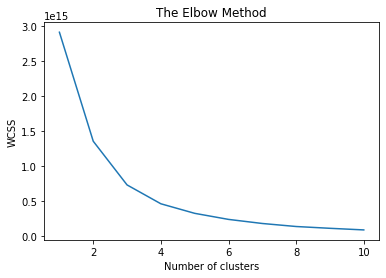

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

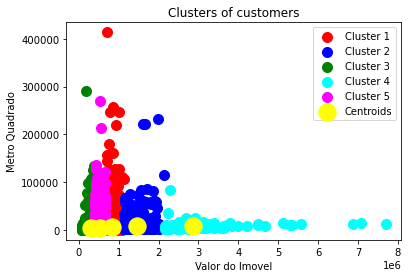

In [11]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Valor do Imovel')
plt.ylabel('Metro Quadrado')
plt.legend()
plt.show()

**COM BASE NESSA ANÁLISE É POSSÍVEL PERCEBER QUE OS IMÓVEIS DO AGRUPAMENTO 1,2 e 5 SÃO OS MAIS VANTAJOSO PARA A EMPRESA ATÉ AGORA, PRINCIPALMENTE OS QUE SÃO DESSE GRUPO E AINDA TEM UMA ÁREA MAIOR, POIS SÃO IMÓVEIS COM BAIXO VALOR PORÉM COM UMA GRANDE ÁREA, LOGO SÃO OTIMOS IMÓVEIS PARA REVENDER E TIRAR UM BOM LUCRO EM COMPARAÇÃO AOS OUTROS.**
        
**PORÉM QUERO FILTRAR AINDA MAIS DE FORMA A ENCONTRAR QUAL AGRUPAMENTO É MAIS VANTAJOSO E EM QUAL ORDEM. SEGUINDO ANÁLISE ABAIXO CRIEI CRITÉRIOS.**

In [12]:
dataset2 = dataset2[['price','bedrooms','bathrooms','floors','waterfront','view','condition','yr_built','yr_renovated']]
df1 = dataset2.values
dfpr1=pd.DataFrame(y_kmeans)
dfpr = np.array(dfpr1)
df = np.concatenate((df1,mq,dfpr), axis = 1)

In [13]:
dftrr= pd.DataFrame(df)
dfinal = dftrr.rename({0:'Valor',1:'Quartos',2:'Banheiros',3:'Andares',4:'Aguafrente',5:'vista',6:'Condições',7:'Tempoconstruido',8:'Reformado',9:'v_med_mquad',10:'Padrões'}, axis=1)
dfinal.head()

,Valor,Quartos,Banheiros,Andares,Aguafrente,vista,Condições,Tempoconstruido,Reformado,v_med_mquad,Padrões
0,221900.0,3.0,1.00,1.0,0.0,0.0,3.0,65.0,0.0,2002.5,2.0
1,538000.0,3.0,2.25,2.0,0.0,0.0,3.0,69.0,1.0,3095.5,4.0
2,180000.0,2.0,1.00,1.0,0.0,0.0,3.0,87.0,0.0,2885.0,2.0
3,604000.0,4.0,3.00,1.0,0.0,0.0,5.0,55.0,0.0,2230.0,4.0
4,510000.0,3.0,2.00,1.0,0.0,0.0,3.0,33.0,0.0,2860.0,4.0


**ABAIXO FIZ UMA ANÁLISE PARA ESCOLHA DOS MELHORES IMÓVEIS, FIZ UM SISTEMA DE PONTUAÇÃO ONDE QUEM TIVER MENOR VALOR DE IMÓVEL TERÁ 5 PONTOS E DECRESCENDO DE ACORDO COM A ORDEM DOS CLUSTERS EX: O QUE TEM MENOR VALOR DE IMÓVEL LEVA 5 PTS, O SEGUNDO MENOR LEVA 4 PTS E ASSIM VAI.
    JÁ PARA A ÁREA FOI O INVERSO, O QUE TIVER MAIOR VALOR ÁREA LEVA A MAIOR PONTUAÇÃO E RESPECTIVAMENTE POR TODOS OS CLUSTER.
    LOGO COM ISSO ESTABELECI 2 CRITÉRIOS O DE MENOR VALOR E O DE MAIOR ÁREA ONDE O CLUSTER QUE TIVER MAIOR PONTUAÇÃO COM A SOMA DOS CRITÉRIOS SERÁ O MAIS VANTAJOSO, POIS EM COMPARAÇÃO AOS OUTROS TERÁ OS MENORES VALORES PARA COMPRA E MAIOR ÁREA LOGO SENDO UMA ÓTIMA OPORTUNIDADE DE REVENDA E OBTENÇÃO DE LUCRO.**

In [14]:
dem1= dfinal.loc[dfinal['Padrões']==0]
c1=np.array(dem1[['Valor','v_med_mquad']].mean())

In [15]:
dem2 = dfinal.loc[dfinal['Padrões']==1]
c2=np.array(dem2[['Valor','v_med_mquad']].mean())

In [16]:
dem3 = dfinal.loc[dfinal['Padrões']==2]
c3=np.array(dem3[['Valor','v_med_mquad']].mean())

In [17]:
dem4 = dfinal.loc[dfinal['Padrões']==3]
c4 = np.array(dem4[['Valor','v_med_mquad']].mean())

In [18]:
dem5 = dfinal.loc[dfinal['Padrões']==4]
c5 =np.array(dem5[['Valor','v_med_mquad']].mean())


**ANÁLISE DE CRITÉRIOS**

**LINHA 0 = MEDIA DO VALOR DO IMÓVEL**

**LINHA 1 = MEDIA DA ÁREA**

In [19]:
analis=pd.DataFrame({'cluster1':c1,'cluster2':c2,'cluster3':c3,'cluster4':c4,'cluster5':c5})
analis

,cluster1,cluster2,cluster3,cluster4,cluster5
0,825622.171720,1.457316e+06,296979.369232,2.855597e+06,522515.586773
1,6726.960156,7.934022e+03,3584.653204,7.886222e+03,4891.311353


**APLICANDO PONTUAÇÃO DOS CRITÉRIOS**

In [20]:
criterios=pd.DataFrame({'cluster1':[3,3,6],'cluster2':[2,5,7],'cluster3':[5,1,6],'cluster4':[1,4,5],'cluster5':[4,2,6]})
criterios

,cluster1,cluster2,cluster3,cluster4,cluster5
0,3,2,5,1,4
1,3,5,1,4,2
2,6,7,6,5,6


**COM BASE NA TABELA  ACIMA PODE SER OBSERVADO QUE OS IMÓVEIS DO AGRUPAMENTO 2 SÃO MAIS VANTAJOSOS, E EM SEGUIDA DELE OS PRÓXIMOS SÃO OS AGRUPAMENTOS 1,5,3,4.**

**E APARTIR DESSA CONCLUSÃO SE FOR DE INTERESSE VOCÊ TAMBÉM PODE VOLTAR AO GRÁFICO DO CLUSTER E VALIDAR MAIS UMA VEZ A ESCOLHA, OBSERVANDO QUE OS CRITÉRIOS DE PONTUAÇÃO SÃO COERENTES E PRECISOS.**

In [21]:
dem2

,Valor,Quartos,Banheiros,Andares,Aguafrente,vista,Condições,Tempoconstruido,Reformado,v_med_mquad,Padrões
5,1225000.0,4.0,4.50,1.0,0.0,0.0,3.0,19.0,0.0,28192.50,1.0
21,2000000.0,3.0,2.75,1.0,0.0,4.0,3.0,52.0,0.0,12741.75,1.0
49,1350000.0,3.0,2.50,1.0,1.0,2.0,5.0,67.0,0.0,17627.75,1.0
69,1325000.0,5.0,2.25,1.0,0.0,0.0,3.0,55.0,0.0,6639.50,1.0
125,1450000.0,4.0,2.75,1.5,0.0,0.0,3.0,106.0,1.0,5822.25,1.0
...,...,...,...,...,...,...,...,...,...,...,...
21551,1375000.0,5.0,4.50,2.0,0.0,0.0,3.0,6.0,0.0,5526.25,1.0
21568,1700000.0,4.0,3.50,2.0,0.0,0.0,3.0,6.0,0.0,4155.75,1.0
21590,1222500.0,4.0,3.50,1.5,0.0,0.0,3.0,13.0,0.0,4816.00,1.0
21597,1575000.0,4.0,3.25,2.0,0.0,0.0,3.0,13.0,0.0,4236.25,1.0


**NOVO CLUSTER PARA ESCOLHER QUAL VENDER MAIS RÁPIDO**

In [22]:
a=pd.DataFrame(dem2['Tempoconstruido'].values)
a = np.array(a)
b=pd.DataFrame(dem2['v_med_mquad'].values)
b = np.array(b)
x1= np.concatenate((a,b), axis = 1)
x1

array([[1.900000e+01, 2.819250e+04],
       [5.200000e+01, 1.274175e+04],
       [6.700000e+01, 1.762775e+04],
       ...,
       [1.300000e+01, 4.816000e+03],
       [1.300000e+01, 4.236250e+03],
       [1.200000e+01, 4.257000e+03]])

**LEVANDO COMO BASE A OBTENÇÃO DOS IMÓVEIS DO AGRUPAMENTO 2 PELA EMPRESA PARA REVENDA.**

**FILTRANDO QUANTOS IMOVEIS TEM MENOS DE 20 ANOS DE CONSTRUÍDO. PARA ASSIM INDICAR QUAIS IMÓVEIS TEM ALTA OU BAIXA CHANCE DE SAÍDA.**

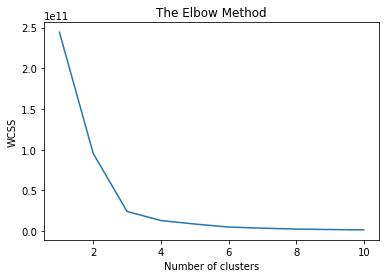

In [23]:
from sklearn.cluster import KMeans
wcss1 = []
for i in range(1, 11):
    kmeans1 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans1.fit(x1)
    wcss1.append(kmeans1.inertia_)
plt.plot(range(1, 11), wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans1 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans1.fit_predict(x1)

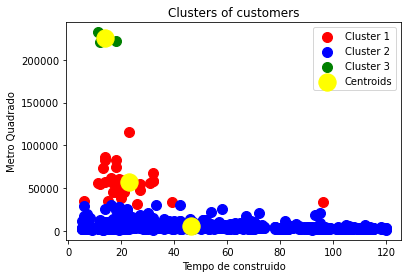

In [25]:
plt.scatter(x1[y_kmeans1 == 0, 0], x1[y_kmeans1 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x1[y_kmeans1 == 1, 0], x1[y_kmeans1 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x1[y_kmeans1 == 2, 0], x1[y_kmeans1 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Tempo de construido')
plt.ylabel('Metro Quadrado')
plt.legend()
plt.show()

**COM ISSO PODE SER VISTO QUE OS IMÓVEIS QUE TEM MAIS CHANCE DE SAÍDA PARA REVENDER SÃO DO AGRUPAMENTO 3 DEPOIS 1 E POR FIM 2, POIS LEVANDO COMO BASE OS IMÓVEIS COM MENOS TEMPO DE CONSTRUÍDO E COM A MAIOR ÁREA, ESSES IMÓVEIS, SÃO OS MELHORES PARA RETIRAR UM EXCELENTE LUCRO, POIS SÃO IMÓVEIS RELATIVAMENTE NOVOS E QUE PODEM SER COMPRADO POR UM ÓTIMO CUSTO BENEFÍCIOS, E POR TER UMA GRANDE ÁREA, ISSO INDICA QUE É UM IMOVEL VALORIZADO E PROCURADO PELOS CLIENTES.**

In [26]:
vf1 = dem2.values
vfpr1=pd.DataFrame(y_kmeans1)
vfpr = np.array(vfpr1)
vdf = np.concatenate((vf1,vfpr), axis = 1)
vdf

array([[1.225000e+06, 4.000000e+00, 4.500000e+00, ..., 2.819250e+04,
        1.000000e+00, 1.000000e+00],
       [2.000000e+06, 3.000000e+00, 2.750000e+00, ..., 1.274175e+04,
        1.000000e+00, 1.000000e+00],
       [1.350000e+06, 3.000000e+00, 2.500000e+00, ..., 1.762775e+04,
        1.000000e+00, 1.000000e+00],
       ...,
       [1.222500e+06, 4.000000e+00, 3.500000e+00, ..., 4.816000e+03,
        1.000000e+00, 1.000000e+00],
       [1.575000e+06, 4.000000e+00, 3.250000e+00, ..., 4.236250e+03,
        1.000000e+00, 1.000000e+00],
       [1.537000e+06, 5.000000e+00, 3.750000e+00, ..., 4.257000e+03,
        1.000000e+00, 1.000000e+00]])

In [27]:
vftrr= pd.DataFrame(vdf)
vfinal = vftrr.rename({0:'Valor',1:'Quartos',2:'Banheiros',3:'Andares',4:'Aguafrente',5:'vista',6:'Condições',7:'Tempoconstruido',8:'Reformado',9:'v_med_mquad',10:'Padrões',11:'Padrao de vendas'}, axis=1)
vfinal

,Valor,Quartos,Banheiros,Andares,Aguafrente,vista,Condições,Tempoconstruido,Reformado,v_med_mquad,Padrões,Padrao de vendas
0,1225000.0,4.0,4.50,1.0,0.0,0.0,3.0,19.0,0.0,28192.50,1.0,1.0
1,2000000.0,3.0,2.75,1.0,0.0,4.0,3.0,52.0,0.0,12741.75,1.0,1.0
2,1350000.0,3.0,2.50,1.0,1.0,2.0,5.0,67.0,0.0,17627.75,1.0,1.0
3,1325000.0,5.0,2.25,1.0,0.0,0.0,3.0,55.0,0.0,6639.50,1.0,1.0
4,1450000.0,4.0,2.75,1.5,0.0,0.0,3.0,106.0,1.0,5822.25,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
942,1375000.0,5.0,4.50,2.0,0.0,0.0,3.0,6.0,0.0,5526.25,1.0,1.0
943,1700000.0,4.0,3.50,2.0,0.0,0.0,3.0,6.0,0.0,4155.75,1.0,1.0
944,1222500.0,4.0,3.50,1.5,0.0,0.0,3.0,13.0,0.0,4816.00,1.0,1.0
945,1575000.0,4.0,3.25,2.0,0.0,0.0,3.0,13.0,0.0,4236.25,1.0,1.0


**PRIMEIRO A VENDER**

**LISTEI OS 5 MELHORES LEVANDO BASE NO SEU VALOR DE METRO QUADRADO**

**ONDE OBTIVE DIVIDINDO O PREÇO INICIAL DO IMOVEL PELO SEU TAMANHO**

In [28]:
pvendas3= vfinal.loc[vfinal['Padrao de vendas']==2]
dfmqd= pvendas3['Valor']/pvendas3['v_med_mquad']
dfmqd = pd.DataFrame(dfmqd)
dfmqd1=np.array(dfmqd)
pvendas31=pvendas3.values
pvendas31 = np.array(pvendas31)
pvendas3final = np.concatenate((pvendas31,dfmqd1), axis = 1)
pvendas3final = pd.DataFrame(pvendas3final)
pvendas3final = pvendas3final.rename({0:'Valor',1:'Quartos',2:'Banheiros',3:'Andares',4:'Aguafrente',5:'vista',6:'Condições',7:'Tempoconstruido',8:'Reformado',9:'v_med_mquad',10:'Padrões',11:'Padrao de vendas',12:'valor_metro'}, axis=1)
pvendas3final.nlargest(n=3,columns='valor_metro')

,Valor,Quartos,Banheiros,Andares,Aguafrente,vista,Condições,Tempoconstruido,Reformado,v_med_mquad,Padrões,Padrao de vendas,valor_metro
0,1998000.0,2.0,2.50,2.0,0.0,0.0,3.0,11.0,0.0,232055.75,1.0,2.0,8.610000
1,1650000.0,4.0,3.25,3.0,0.0,3.0,3.0,18.0,0.0,222373.50,1.0,2.0,7.419949
2,1600000.0,4.0,5.50,2.0,0.0,2.0,3.0,12.0,0.0,221065.00,1.0,2.0,7.237690


**SEGUNDO A VENDER**

**LISTEI OS 5 MELHORES LEVANDO BASE NO SEU VALOR DE METRO QUADRADO**

**ONDE OBTIVE DIVIDINDO O PREÇO INICIAL DO IMOVEL PELO SEU TAMANHO**

In [29]:
pvendas1= vfinal.loc[vfinal['Padrao de vendas']==0]
dfmqd1= pvendas1['Valor']/pvendas1['v_med_mquad']
dfmqd1 = pd.DataFrame(dfmqd1)
dfmqd1=np.array(dfmqd1)
pvendas11=pvendas1.values
pvendas11 = np.array(pvendas11)
pvendas1final = np.concatenate((pvendas11,dfmqd1), axis = 1)
pvendas1final = pd.DataFrame(pvendas1final)
pvendas1final = pvendas1final.rename({0:'Valor',1:'Quartos',2:'Banheiros',3:'Andares',4:'Aguafrente',5:'vista',6:'Condições',7:'Tempoconstruido',8:'Reformado',9:'v_med_mquad',10:'Padrões',11:'Padrao de vendas',12:'valor_metro'}, axis=1)
pvendas1final.nlargest(n=5,columns='valor_metro')

,Valor,Quartos,Banheiros,Andares,Aguafrente,vista,Condições,Tempoconstruido,Reformado,v_med_mquad,Padrões,Padrao de vendas,valor_metro
19,1640000.0,5.0,4.00,2.0,0.0,0.0,3.0,26.0,0.0,31901.75,1.0,0.0,51.407838
7,1575000.0,4.0,3.50,2.0,0.0,0.0,3.0,15.0,0.0,35694.00,1.0,0.0,44.125063
15,1950000.0,4.0,3.25,2.0,0.0,3.0,3.0,18.0,0.0,45677.25,1.0,0.0,42.690836
29,1459000.0,4.0,4.00,2.0,0.0,0.0,3.0,6.0,0.0,34862.00,1.0,0.0,41.850726
14,1610000.0,5.0,4.50,3.0,0.0,0.0,3.0,20.0,0.0,38723.75,1.0,0.0,41.576552


**VALE RESSALTAR QUE MESMO QUE ESSES IMÓVEIS ABAIXO CLASSIFICADOS COMO ÚLTIMO A SEREM VENDIDOS, FICA A DISPOSIÇÃO DO CEO DA EMPRESA A OBTENÇÃO OU NÃO DELES PARA REVENDA, POIS MESMO TENDO UM EXCELENTE CUSTO BENEFÍCIO ENTRE "VALOR DE COMPRA X LUCRO", DEVIDO O SEU TAMANHO, OS MESMOS SÃO IMOVEIS QUE NA SUA MÉDIA TEM MUITOS ANOS DE CONSTRUÍDO, OU SEJA SÃO RELATIVAMENTE ANTIGOS, LOGO MINHA SUGESTÃO É QUE DENTRE ESSES O MAIS INTERESSANTE É REALIZAR A OBTENÇÃO SOMENTE DOS QUE FORAM REFORMADOS. LOGO ABAIXO IREI LISTA-LOS.**

**TERCEIRO A VENDER**

**LISTEI OS 5 MELHORES LEVANDO BASE NO SEU VALOR DE METRO QUADRADO**

**ONDE OBTIVE DIVIDINDO O PREÇO INICIAL DO IMOVEL PELO SEU TAMANHO**

In [32]:
pvendas2= vfinal.loc[vfinal['Padrao de vendas']==1]
dfmqd2 = pvendas2['Valor']/pvendas2['v_med_mquad']
dfmqd2 = pd.DataFrame(dfmqd2)
dfmqd2 =np.array(dfmqd2)
pvendas21=pvendas2.values
pvendas21 = np.array(pvendas21)
pvendas2final = np.concatenate((pvendas21,dfmqd2), axis = 1)
pvendas2final = pd.DataFrame(pvendas2final)
pvendas2final = pvendas2final.rename({0:'Valor',1:'Quartos',2:'Banheiros',3:'Andares',4:'Aguafrente',5:'vista',6:'Condições',7:'Tempoconstruido',8:'Reformado',9:'v_med_mquad',10:'Padrões',11:'Padrao de vendas',12:'valor_metro'}, axis=1)
pvendas2final.nlargest(n=5,columns='valor_metro')

,Valor,Quartos,Banheiros,Andares,Aguafrente,vista,Condições,Tempoconstruido,Reformado,v_med_mquad,Padrões,Padrao de vendas,valor_metro
622,1850000.0,4.0,3.25,2.0,0.0,3.0,5.0,106.0,0.0,1925.00,1.0,1.0,961.038961
130,1234570.0,2.0,2.50,3.0,0.0,0.0,3.0,9.0,0.0,1387.25,1.0,1.0,889.940530
326,1452000.0,2.0,3.25,2.0,1.0,3.0,3.0,32.0,0.0,1817.00,1.0,1.0,799.119428
608,1330000.0,3.0,1.50,1.5,0.0,2.0,3.0,120.0,0.0,1691.25,1.0,1.0,786.400591
411,2000000.0,4.0,3.75,2.0,0.0,3.0,3.0,8.0,0.0,2560.00,1.0,1.0,781.250000


**SEGUE ABAIXO OS IMÓVEIS A SEREM VENDIDOS POR ÚLTIMO, QUE FORAM REFORMADOS.**

**LISTEI OS 5 MELHORES LEVANDO BASE NO SEU VALOR DE METRO QUADRADO**

**ONDE OBTIVE DIVIDINDO O PREÇO INICIAL DO IMOVEL PELO SEU TAMANHO**

In [33]:
preform = pvendas2final.loc[pvendas2final['Reformado']==1]
preform.nlargest(n = 5, columns= 'valor_metro')

,Valor,Quartos,Banheiros,Andares,Aguafrente,vista,Condições,Tempoconstruido,Reformado,v_med_mquad,Padrões,Padrao de vendas,valor_metro
378,1755000.0,3.0,2.00,2.0,0.0,0.0,3.0,111.0,1.0,2380.0,1.0,1.0,737.394958
299,1320000.0,4.0,3.00,2.0,0.0,3.0,4.0,112.0,1.0,1960.0,1.0,1.0,673.469388
451,1325000.0,4.0,3.50,2.0,0.0,0.0,3.0,115.0,1.0,2003.0,1.0,1.0,661.507738
407,1399000.0,3.0,2.50,2.0,0.0,0.0,3.0,53.0,1.0,2180.0,1.0,1.0,641.743119
284,1535000.0,4.0,3.25,2.0,0.0,3.0,3.0,112.0,1.0,2450.0,1.0,1.0,626.530612
